## S&P 500 ETF (SPY)
SPY market data obtained from Yahoo finance

Daily prices from 1/29/1993 - 4/23/2021

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import norm, skew, skewtest, kurtosis, kurtosistest

%matplotlib inline

In [2]:
# Read SPY data
df = pd.read_csv("./SPY.csv")
df.head()

# Questions:
# Should we use the close price, or adjusted close price for our analysis
# https://www.investopedia.com/terms/a/adjusted_closing_price.asp

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,25.884184,1003200
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,26.068277,480500
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,26.123499,201300
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,26.399649,529400
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,26.510111,531500


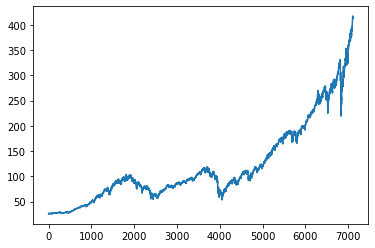

In [29]:
plt.plot(df["Adj Close"])

In [30]:
# Calculate log returns of Close price
log_returns = np.log(df["Adj Close"]) - np.log(df["Adj Close"].shift(1))
log_returns = log_returns[log_returns.notnull()] # Remove the Null at index 0

# Calculate statistics to generate true normal distribution
mu, sigma = norm.fit(log_returns)


# print("observed mu:", mu)
# print("observed sigma:", sigma)

## Compare to Normal distribution

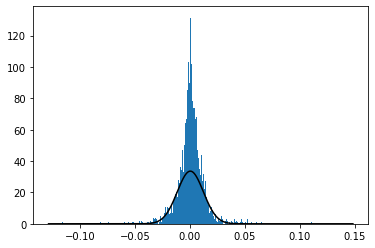

In [31]:
# Plot histogram of observed log returns
plt.hist(log_returns, bins = 1000);
xmin, xmax = plt.xlim()
# CL: This plot looks fairly normal to me. I was expecting to see fat tails or other skews.

# Plot normal distribution over histogram of observed log returns
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k')

## Daily volatility over time

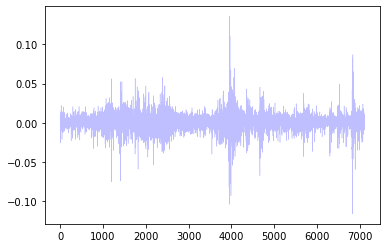

In [63]:
plt.plot(
    np.arange(0, len(np.diff(np.log(df["Adj Close"]))), step=1),
    log_returns,
    'k', 
    color = "blue",
    linewidth = 0.5,
    alpha = 0.25
)

## Statistical analysis

In [33]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,25.884184,1003200
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,26.068277,480500
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,26.123499,201300
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,26.399649,529400
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,26.510111,531500


In [65]:
# Mean
mu = np.mean(log_returns)
print("mu: \t", mu)

mu: 	 0.00039088906686425416


In [69]:
# Variance
var = pow(np.std(log_returns), 2)
print("variance: \t", var)

variance: 	 0.00014124770240419692


In [73]:
# Skewness
skewness = skew(log_returns)
print("skewness: \t", skewness)
print(skewtest(log_returns))

skewness: 	 -0.29831601886931364
SkewtestResult(statistic=-10.063949916449852, pvalue=7.973363977446626e-24)


In [78]:
# Kurtosis
kurt = kurtosis(log_returns)
print("kurtosis: \t", kurt)
print(kurtosistest(log_returns))

kurtosis: 	 11.696982967256597
KurtosistestResult(statistic=36.83508600799532, pvalue=5.0683442221450403e-297)


### Density plot

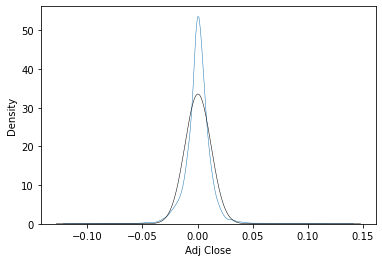

In [94]:
# Density plot of log returns
ax = sns.kdeplot(log_returns, linewidth = 0.5)
# Normal distribution overlay
ax.plot(x, p, 'k', linewidth = 0.5)

In [55]:
np.where(np.isnan(np.log(np.diff(df["Adj Close"]))))[0]

<ipython-input-55-8d0442b49ed6>:1: RuntimeWarning: divide by zero encountered in log
  len(np.where(np.isnan(np.log(np.diff(df["Adj Close"]))))[0])
<ipython-input-55-8d0442b49ed6>:1: RuntimeWarning: invalid value encountered in log
  len(np.where(np.isnan(np.log(np.diff(df["Adj Close"]))))[0])


3207